In [4]:
from moviepy.editor import *
from IPython.display import Image
import pyttsx3
import wave
import contextlib
from random import randint
import requests
import spacy
import json

In [5]:
limit = 1
nlp=spacy.load("en_core_web_sm")
api_url = 'https://api.api-ninjas.com/v1/facts?limit={}'.format(limit)

def get_fact():
    response = requests.get(api_url, headers={'X-Api-Key': 'YOUR_API_KEY'})
    if response.status_code == requests.codes.ok:
        print(response.text)
        return response.text
    else:
        print("Error:", response.status_code, response.text)

flag=0
while(flag==0):
    fact= get_fact()
    # print(len(fact))
    doc=nlp(fact)
    # print (doc.ents)
    for X in doc.ents:
        #CAN ALSO DO IF X.label_=="GPE"
        if (len(fact)>=100):
            flag=1
            name=X.text
            break
print("\n"+name+"\n")
fact=json.loads(fact)[0]["fact"]
print(fact)



[{"fact": "The name for Ivory Soap was inspired by a verse from the Bible. Harley Proctor got though of the name when the minister read from Psalms 45:8, \"All thy garments smell of myrrh and aloes and cassia, out of the ivory palaces whereby they have made thee glad.\""}]

Ivory Soap

The name for Ivory Soap was inspired by a verse from the Bible. Harley Proctor got though of the name when the minister read from Psalms 45:8, "All thy garments smell of myrrh and aloes and cassia, out of the ivory palaces whereby they have made thee glad."


In [6]:
questiontext= "Did you know?"
answersay= fact

answertext= fact
answerlist=list(answertext)
i=30
while(i<len(answerlist)):
    if(answerlist[i]==" "):
        answerlist[i]="\n"
        if(i+30>=len(answerlist)):
            break
        i+=30
    else:
        i+=1

def convert(s):
    new = ""
    for x in s:
        new += x 
    return new
answertext= convert(answerlist)

In [7]:
engine = pyttsx3.init()
engine.save_to_file(answersay, 'static/test2.mp3' )
engine.runAndWait()

with contextlib.closing(wave.open("static/test2.mp3",'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    

In [8]:
knowaudio = AudioFileClip("static/test1.mp3")
knowaudioclip = CompositeAudioClip([knowaudio])
answeraudio = AudioFileClip("static/test2.mp3")
answeraudioclip = CompositeAudioClip([answeraudio])


In [9]:
x=randint(0,2)
y=randint(0,2)
z=randint(0,2)

def randomize_color(image):
    return image[:,:,[x,y,z]]

BackgroundClip= VideoFileClip("static/background.mp4").fl_image( randomize_color )



In [10]:
knowback= BackgroundClip.subclip(0,3) 
knowtext= TextClip(questiontext, fontsize=80, color="white" , font="Microsoft-Uighur-Bold", bg_color="black").set_position("center").set_duration(3)
knowclip= CompositeVideoClip([knowback,knowtext])
knowclip.audio= knowaudioclip

In [11]:
answerback= BackgroundClip.subclip(3,3+duration)
answertext= TextClip(answertext, fontsize=50, color="white" , font="Microsoft-Uighur", bg_color="black").set_position("center").set_duration(duration)
answerclip= CompositeVideoClip([answerback,answertext])
answerclip.audio= answeraudioclip

In [12]:
subscribeclip= VideoFileClip("static/Subscribe.mp4").fx(vfx.fadein, 1).fx(vfx.speedx, 2)

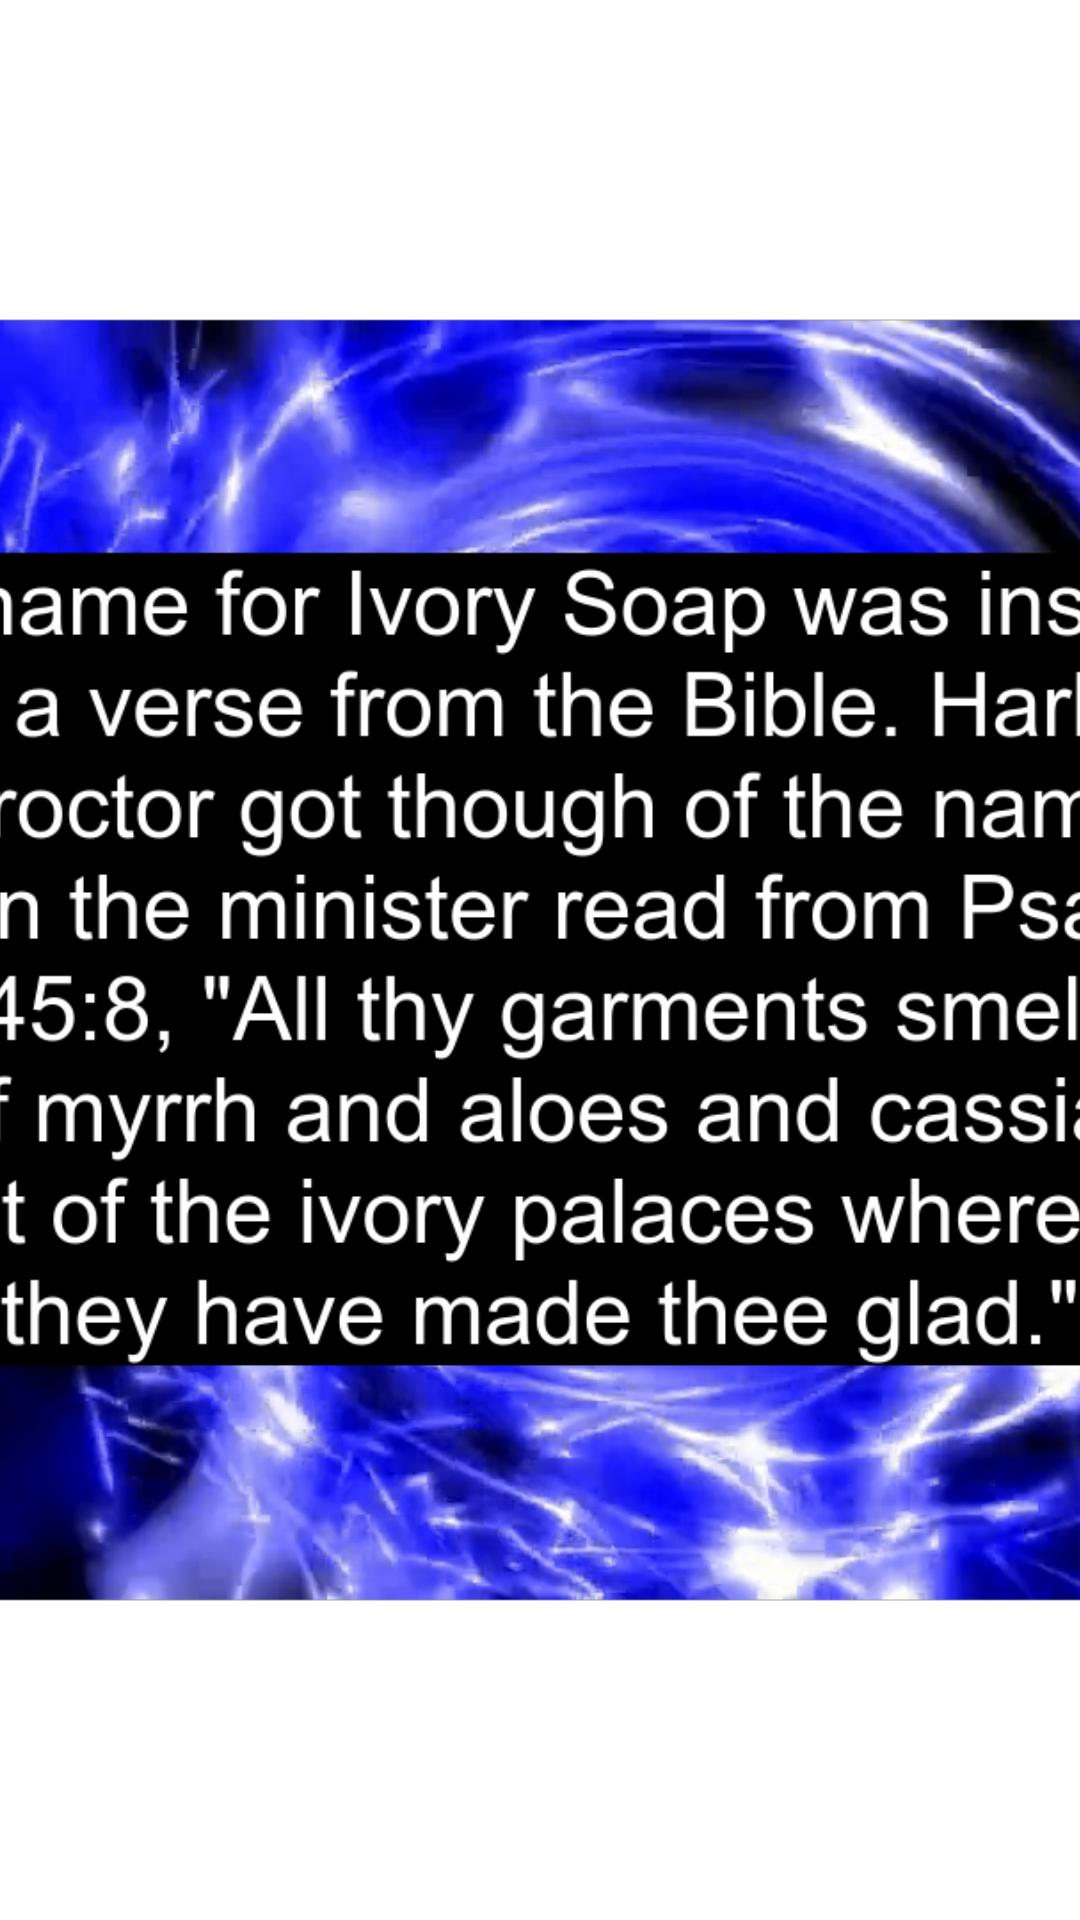

In [13]:
compile=concatenate_videoclips([knowclip, answerclip, subscribeclip], method="compose")
video = compile.resize(height=1920)
video = video.crop(x1=1166.6,y1=0,x2=2246.6,y2=1920)
video.save_frame("static/frame.png", 6)
Image(filename="static/frame.png")

In [14]:
video.write_videofile("static/temp.mp4", fps=120)

Moviepy - Building video static/temp.mp4.
MoviePy - Writing audio in tempTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video static/temp.mp4



Moviepy - Done !
Moviepy - video ready static/temp.mp4


In [16]:
#python C:\python_ytshorts\scripter.py
from test import *
upload(name.upper())

python upload.py --file=C:\python_ytshorts\static\temp.mp4 --title="AMAZING LIFE FACT about IVORY SOAP #shorts"  --description="ABOUT OUR CHANNEL Our channel is about Facts. We cover lots of cool stuff such as Facts Check out our channel here:https://www.youtube.com/channel/UCeT_1wHgBWVfNZUM4tCWWmADon’t forget to subscribe!" --category="1" --keywords="facts about the ivory soap,facts about,facts about ivory soap,amazing facts about ivory soap,surprising facts about the ivory soap,5 random facts about the ivory soap,about,interesting facts about ivory soap,random facts about the ivory soap,the worst things about ivory soap,facts about beer,facts about skoda,facts about czech,facts about czechs,facts about the world,facts about countries,facts about ice hockey" --privacyStatus="public" 
